In [1]:
import os#경로, 파일명 등의 것들을 위해서 있는거임
from glob import glob#전체 경로에서 엥뭐야시발ㅋㅋ

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
os.getcwd()

'/content'

In [4]:
#os.listdir('/content/gdrive/My Drive/fastcampus/mnist_png/training/0/')

In [5]:
data_paths = glob('/content/gdrive/My Drive/fastcampus/mnist_png/training/*/*.png')#모든 파일의 절대경로를 다 가져옴

In [6]:
len(data_paths)

60001

In [7]:
data_paths[-1]

'/content/gdrive/My Drive/fastcampus/mnist_png/training/5/17890.png'

In [8]:
path = data_paths[0]

In [9]:
path

'/content/gdrive/My Drive/fastcampus/mnist_png/training/9/46020.png'

In [10]:
os.listdir('/content/gdrive/My Drive/fastcampus/mnist_png/training/')

['9', '0', '7', '6', '1', '3', '4', '8', '2', '5']

In [11]:
label_nums = os.listdir('/content/gdrive/My Drive/fastcampus/mnist_png/training/')
label_nums.sort()
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [12]:
nums_dataset = []

for lbl_n in label_nums:
  data_per_class = os.listdir('/content/gdrive/My Drive/fastcampus/mnist_png/training/'+lbl_n)
  nums_dataset.append(len(data_per_class))

In [13]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [14]:
nums_dataset

[5923, 6742, 5958, 6131, 5843, 5421, 5918, 6265, 5851, 5949]

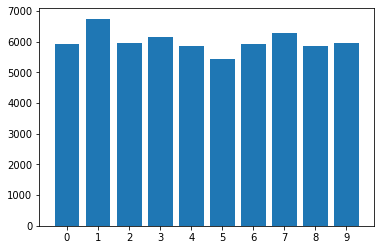

In [15]:
plt.bar(label_nums, nums_dataset)
plt.show()

#Pillow로 열기

In [16]:
image_pil = Image.open(path)

In [17]:
image = np.array(image_pil)

In [18]:
image.shape

(28, 28)

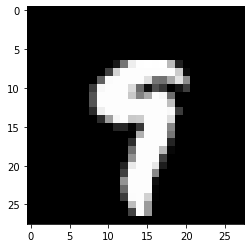

In [19]:
plt.imshow(image,'gray')

In [20]:
#tensorflow로 열기
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [21]:
image.shape#맨 뒤에 채널이 있다.

TensorShape([28, 28, 1])

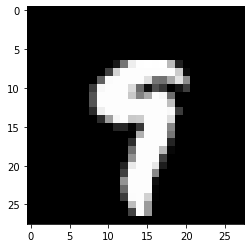

In [22]:
plt.imshow(image[:,:,0],'gray')
plt.show()

In [23]:
path

'/content/gdrive/My Drive/fastcampus/mnist_png/training/9/46020.png'

In [24]:
label = path.split('/')[-2]#마지막에서 두 번째

In [25]:
int(label)

9

In [26]:
def get_label(path):
  class_name = path.split('/')[-2]
  label = int(class_name)
  return label

In [27]:
path, get_label(path)

('/content/gdrive/My Drive/fastcampus/mnist_png/training/9/46020.png', 9)

#데이터 이미지 사이즈 알기

In [28]:
from tqdm import tqdm_notebook#tqdm은 
#데이터의 크기를 알고 정규화?를 시켜야 좋다

In [29]:
heights = []
widths = []

In [30]:
data_paths[:10]

['/content/gdrive/My Drive/fastcampus/mnist_png/training/9/46020.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/56205.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/49752.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/53703.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/52340.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/48634.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/57567.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/48030.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/53680.png',
 '/content/gdrive/My Drive/fastcampus/mnist_png/training/9/57469.png']

In [31]:
img_pil = Image.open(path)
image = np.array(img_pil)
h, w =image.shape
h,w

(28, 28)

In [ ]:
for path in tqdm_notebook(data_paths):#tqdsm개꿀
  img_pil = Image.open(path)
  image = np.array(img_pil)#부르고
  h, w =image.shape#shape보고

  heights.append(h)#추가
  widths.append(w)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
np.unique(heights)#요렇게하면보임
np.unique(widths)

In [ ]:
plt.figure(figsize = (20,10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')

ptl.show()